<a href="https://colab.research.google.com/github/Shihabtareq/Energy-Demand-of-Bangladesh/blob/master/Energy_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyflux


     |████████████████████████████████| 1.3MB 1.4MB/s 
     |████████████████████████████████| 962kB 34.0MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656607 sha256=b952302c031eb79cebaab525f7bf9812d65a6d8f4df4fe9ed2cfa65bc44bdb0e
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [0]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Shihabtareq/Energy-Demand-of-Bangladesh/master/Eenrgy-demand.csv",parse_dates=['Year'], index_col='Year')
df.head()

,Demand,Population,GDP
Year,,,
1994-01-01,2038,117,300
1995-01-01,2220,119,329
1996-01-01,2419,120,395
1997-01-01,2638,127,401
1998-01-01,2881,128,407


In [10]:
df.dtypes

Demand        int64
Population    int64
GDP           int64
dtype: object

In [11]:
df.describe()

,Demand,Population,GDP
count,25.000000,25.000000,25.000000
mean,6069.080000,141.960000,714.080000
std,3310.284327,14.698299,406.263453
min,2038.000000,117.000000,300.000000
25%,3394.000000,132.000000,413.000000
50%,5112.000000,141.000000,510.000000
75%,8349.000000,154.000000,883.000000
max,13044.000000,166.000000,1698.000000


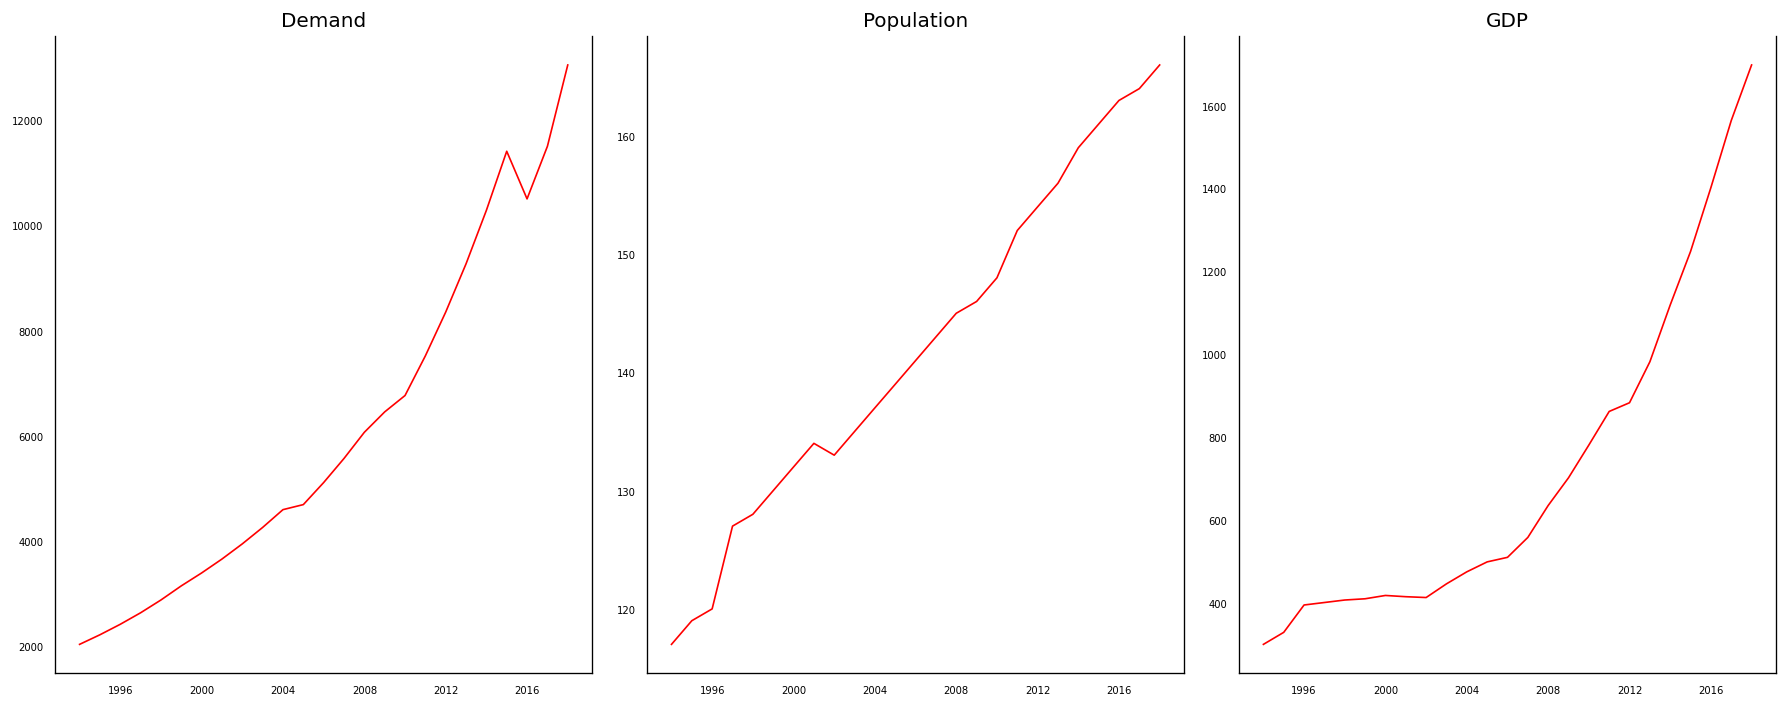

In [20]:
#visualize the data
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=120, figsize=(15,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [8]:
model = pf.ARIMAX(data=df, formula='Demand~1+Population+GDP',
                  ar=1, ma=1,integ=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,1,1)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Demand                  Method: MLE                                       
Start Date: 1995-01-01 00:00:00                         Log Likelihood: -163.7947                         
End Date: 2018-01-01 00:00:00                           AIC: 339.5893                                     
Number of observations: 23                              BIC: 346.4023                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.1414     0.2623     0.5391   0.5898   (-0.3726 | 0.6554)       
MA(1)                                

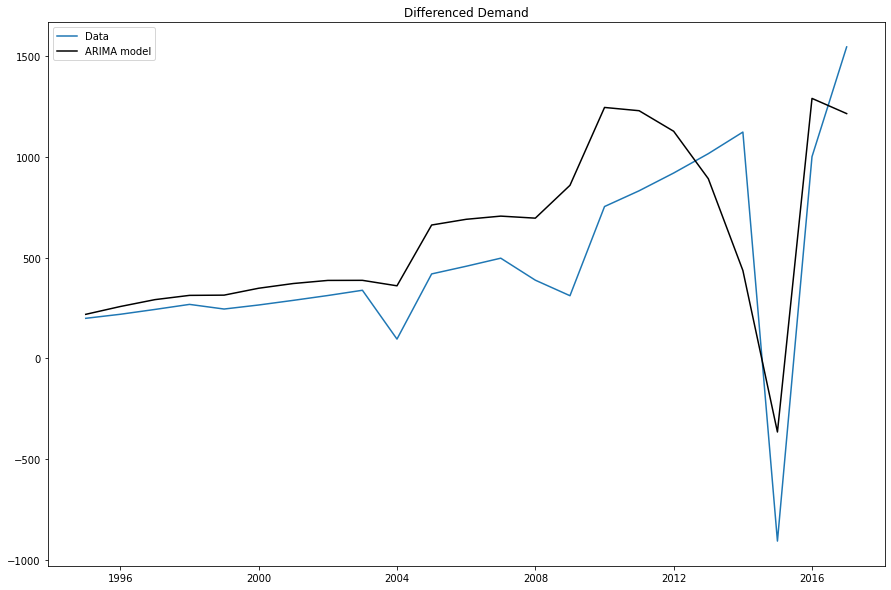

In [9]:
model.plot_fit(figsize=(15,10))

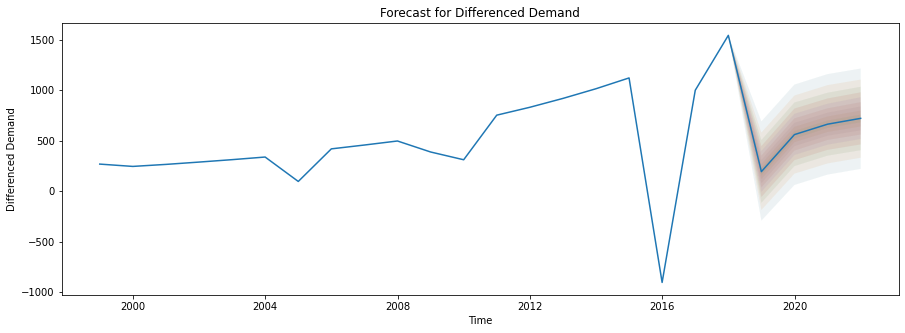

In [13]:
model.plot_predict(h=4, oos_data=df.iloc[-4:], past_values=20, figsize=(15,5))